<a href="https://colab.research.google.com/github/camilorenzo88/Lorenzo_Porfolio/blob/main/Lorenzo_Entrega_Ciencia_de_Datos_II_FinalF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movilidad Urbana y uso del tiempo en Argentina

## Contexto y audiencia

**Abstracto**

Este proyecto tiene como objetivo principal identificar y clasificar los diferentes patrones de uso del tiempo de individuos en Argentina. El análisis de estos patrones permitirá comprender mejor cómo se distribuye el tiempo en diversas actividades y cómo estas pueden variar según el perfil demográfico y la ubicación geográfica. Se emplearán técnicas de análisis exploratorio de datos (EDA) para extraer insights valiosos y, posteriormente, se proporcionarán recomendaciones basadas en estos hallazgos. Con base en este objetivo, se utilizará la Base ENUT del Instituto Nacional de Estadística y Censos (INDEC) de Argentina, creada a partir de un sondeo sobre el uso del tiempo en diversas regiones del país.

**Audiencia**

Los resultados pueden ser útiles para entes gubernamentales, específicamente para planificar políticas públicas relacionadas con el trabajo, el cuidado de la salud, la educación, el transporte y otros aspectos de la vida diaria de las personas. Asimismo, podrá ser útil para analistas de datos interesados en el análisis de los patrones de uso del tiempo. Por último, también puede ser útil para empresas y organizaciones que busquen comprender mejor a sus clientes y empleados, adaptando sus productos y servicios según las necesidades y preferencias identificadas en el estudio.

**Limitaciones**

Si bien la base ENUT nos proporciona una cantidad de datos importante, sería interesante en analisis posteriores incorporar datos vinculados a los medios de transporte utilizados en los distintos viajes que realizan las personas, así como obtener información georeferenciada, para indagar cómo es la movilidad y uso del tiempo en puntos específicos del país.



## Preguntas de interés

**Preguntas de interés**
* ¿Cuáles son los patrones de uso de tiempo más comunes entre diferentes grupos sociodemográficos?
  - ¿Cómo distribuyen su tiempo los distintos rangos etarios?
  - ¿Cómo distribuyen su tiempo las personas con distintos nivel educativo?
  - ¿Cómo distribuyen su tiempo los mujeres y los varones?
  - ¿Cuánto tiempo destinas a tareas doméstica hombre y mujeres?

* ¿Cómo se distribuyen las actividades diarias entre trabajo y ocio a lo largo de la semana?
  -¿Cuáles son los principales momentos destinados al trabajo?
  - ¿Cuáles son los principales horarios de ocio?
  - ¿Cuáles son las principales actividades se realizan los días de semana? ¿y los fines de semana?

* ¿Existen diferencias significativas en el los patrones de uso del tiempo y la movilidad urbana?
  - ¿Cuáles son los principales horarios de movilidad según tipo de día (día de semana | fin de semana)?
  - ¿Cuál es el promedio de tiempo destinado a viajar al trabajo según nivel educativo?

* ¿Cómo varía la movilidad urbana y uso del tiempo en actividades diarias según la región geográfica del país?
  - ¿Cómo son las jornadas laborales en las distintas regiones del país?
  - ¿Cómo se distribuye el tiempo destinado a distintas actividades en las regiones del país?

## 1. Data adquisition

Con el objetivo de responder a las distintas preguntas de interés se buscaron por medio de distintas fuentes algunos dataset que podría ser útiles para responder estas preguntas. Primero se recurrió a los datos abiertos proporcionados en la página datos.gob.ar y recurrimos a datos del Instituto Nacional de Estadísticas y Censos de la República Argentina (INDEC).

El dataset No. 1 era una posibilidad para indagar en el tipo de móvil utilizado según los horarios principales. Sin embargo, lo descartamos porque queríamos enriquecer el análisis con datos sociodemográficos y/o georeferenciados y este sólo brindaba información de la región metropolitana.

Finalmente, se tomaron los dataset de la Encuesta del Uso del Tiempo del INDEC (2021).

**Características de la base de datos**

La Base ENUT constituye una plataforma del Instituto Nacional de Estadística y Censos (INDEC) de Argentina, creada a partir de un sondeo sobre el uso del tiempo en diversas regiones del país. Esta base resume el conjunto de variables relevantes para el análisis de datos de la encuesta, sirviendo como punto de partida para la generación de estimaciones detalladas sobre el uso del tiempo de las personas, así como para la caracterización de los hogares.

Específicamente, para este proyecto de CoderHouse se seleccionó una base denominada “Base diario (enut2021_diario.txt)”. Esta presenta un registro por cada franja horaria de 10 minutos en las que se descomponen las 24 horas del día, con su horario correspondiente. De esta forma, se desagrega el día completo de un individuo seleccionado en 144 filas, cada una con tres variables para registrar el código de actividad realizada. Se registra una actividad como mínimo y tres en simultáneo como máximo para cada franja de 10 minutos, por lo que la variable ACTIVIDAD_1 contendrá siempre un código de actividad, mientras que las variables ACTIVIDAD_2 y ACTIVIDAD_3 presentarán código de actividad o ausencia de valor (usualmente identificados como valores null o NA) según corresponda.
Con base en nuestro objetivo, se anexaron a esta base columnas correspondientes a la base ENUT general que complementa información de los individuos (género, edad, nivel educativo, región, día de la semana y tipo de día).


### Dataset No.1

In [1]:
import requests
import json
import pandas as pd
from io import StringIO


In [2]:
# URL de la API o enlace directo al archivo de datos
url = 'https://datos.transporte.gob.ar/dataset/254f0d95-2a1e-481d-bbfd-9f98a4d694bf/resource/4d2fc0c1-c1ce-4ddd-a678-27d109aee80c/download/hexagonos_2019.csv'

# Descargar el contenido del archivo
response = requests.get(url)
response.raise_for_status()  # Asegura que la solicitud se haya completado correctamente


In [3]:
response.text

'ï»¿ID_HEXAGONO;MODO;HORA;OPERACIONES\r\n13026909;BUS;17;17\r\n13026909;BUS;18;6\r\n13033073;BUS;8;4\r\n13033073;BUS;17;11\r\n13033073;BUS;18;1\r\n13033074;BUS;8;1\r\n13033074;BUS;17;6\r\n13039237;BUS;8;3\r\n13039237;BUS;17;10\r\n13063892;BUS;16;2\r\n13094711;BUS;17;1\r\n13100874;BUS;17;1\r\n13107038;BUS;17;1\r\n13113201;BUS;17;1\r\n13156347;BUS;8;2\r\n13162510;BUS;8;1\r\n13181002;BUS;8;1\r\n13205657;BUS;7;1\r\n13224147;BUS;7;3\r\n13224147;BUS;8;1\r\n13224147;BUS;15;1\r\n13224147;BUS;17;1\r\n13230308;BUS;5;1\r\n13230308;BUS;7;9\r\n13230308;BUS;8;3\r\n13230308;BUS;9;1\r\n13230308;BUS;11;2\r\n13230308;BUS;13;8\r\n13230308;BUS;15;2\r\n13230308;BUS;16;6\r\n13230308;BUS;17;1\r\n13230308;BUS;18;13\r\n13230308;BUS;21;1\r\n13230308;BUS;23;3\r\n13230309;BUS;5;1\r\n13230309;BUS;7;3\r\n13230309;BUS;8;1\r\n13230309;BUS;9;2\r\n13230309;BUS;11;2\r\n13230309;BUS;13;2\r\n13230309;BUS;15;1\r\n13230309;BUS;17;5\r\n13230309;BUS;20;1\r\n13230310;BUS;5;2\r\n13230310;BUS;8;1\r\n13230310;BUS;11;3\r\n13230310

In [4]:
response

<Response [200]>

In [5]:
# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(StringIO(response.text),sep=';')

In [6]:
# Mostrar las primeras filas del DataFrame
df.head()


ï»¿ID_HEXAGONO MODO  HORA  OPERACIONES
0        13026909  BUS    17           17
1        13026909  BUS    18            6
2        13033073  BUS     8            4
3        13033073  BUS    17           11
4        13033073  BUS    18            1

### Dataset No.2


In [7]:
import pandas as pd
import requests
from io import StringIO
import zipfile
import os

# URL de la API o enlace directo al archivo de datos
url2 = 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/enut/enut2021_diario.zip'

# Descargar el contenido del archivo
response2 = requests.get(url2)
response2.raise_for_status()  # Asegura que la solicitud se haya completado correctamente

# Guardar el contenido en un archivo temporal
zip_file_path = 'enut2021_diario.zip'
with open(zip_file_path, 'wb') as file:
    file.write(response2.content)

print("Archivo descargado y guardado como enut2021_diario.zip")

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('enut2021_diario')

print("Archivo descomprimido en la carpeta enut2021_diario")

# Listar los archivos descomprimidos
extracted_files = os.listdir('enut2021_diario')
print("Archivos descomprimidos:", extracted_files)

# Verificar que el archivo descomprimido es 'enut2021_diario.txt'
if 'enut2021_diario.txt' in extracted_files:
    # Cargar el archivo específico en un DataFrame de pandas
    txt_file_path = 'enut2021_diario/enut2021_diario.txt'
    df2 = pd.read_csv(txt_file_path, delimiter='|')  # Ajusta el delimitador según el archivo

    # Mostrar las primeras filas del DataFrame
    print(df2.head())
else:
    print("El archivo enut2021_diario.txt no se encuentra en la carpeta descomprimida.")


Archivo descargado y guardado como enut2021_diario.zip
Archivo descomprimido en la carpeta enut2021_diario
Archivos descomprimidos: ['enut2021_diario.txt']
       ID  N_MIEMBRO  N_FILA  ACTIVIDAD_HORA  ACTIVIDAD_MINUTO  ACTIVIDAD_1  \
0  138453          2      56               9                10        911.0   
1  138453          2      57               9                20        921.0   
2  138453          2      58               9                30        921.0   
3  138453          2      59               9                40        921.0   
4  138453          2      60               9                50        921.0   

   ACTIVIDAD_2  ACTIVIDAD_3  
0        411.0          NaN  
1        411.0          NaN  
2        411.0          NaN  
3        411.0          NaN  
4        411.0          NaN  


In [8]:
df2. head()

ID  N_MIEMBRO  N_FILA  ACTIVIDAD_HORA  ACTIVIDAD_MINUTO  ACTIVIDAD_1  \
0  138453          2      56               9                10        911.0   
1  138453          2      57               9                20        921.0   
2  138453          2      58               9                30        921.0   
3  138453          2      59               9                40        921.0   
4  138453          2      60               9                50        921.0   

   ACTIVIDAD_2  ACTIVIDAD_3  
0        411.0          NaN  
1        411.0          NaN  
2        411.0          NaN  
3        411.0          NaN  
4        411.0          NaN

### Dataset No. 3

In [9]:
import pandas as pd
import requests
from io import StringIO
import zipfile
import os

# URL de la API o enlace directo al archivo de datos
url3 = 'https://www.indec.gob.ar/ftp/cuadros/menusuperior/enut/enut2021_base.zip'

# Descargar el contenido del archivo
response3 = requests.get(url3)
response3.raise_for_status()  # Asegura que la solicitud se haya completado correctamente

# Guardar el contenido en un archivo temporal
zip_file_path = 'enut2021_base.zip'
with open(zip_file_path, 'wb') as file:
    file.write(response3.content)

print("Archivo descargado y guardado como enut2021_base.zip")

# Descomprimir el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('enut2021_base')

print("Archivo descomprimido en la carpeta enut2021_base")

# Listar los archivos descomprimidos
extracted_files = os.listdir('enut2021_base')
print("Archivos descomprimidos:", extracted_files)

# Verificar que el archivo descomprimido es 'enut2021_diario.txt'
if 'enut2021_base.txt' in extracted_files:
    # Cargar el archivo específico en un DataFrame de pandas
    txt_file_path = 'enut2021_base/enut2021_base.txt'
    df3 = pd.read_csv(txt_file_path, delimiter='|')  # Ajusta el delimitador según el archivo

    # Mostrar las primeras filas del DataFrame
    print(df3.head())
else:
    print("El archivo enut2021_base.txt no se encuentra en la carpeta descomprimida.")

Archivo descargado y guardado como enut2021_base.zip
Archivo descomprimido en la carpeta enut2021_base
Archivos descomprimidos: ['enut2021_base.txt']
       ID  WHOG   WPER  REGION  N_MIEMBRO  BHCV01  BHCV02  BHCV03  BHCV04  \
0  112610   778   1580       1          1       4       1       1       2   
1  138176  1669   2175       1          1       4       2       1       8   
2  192097  1891   5078       1          1       4       2       1       8   
3  185333  1853   2182       1          1       4       2       1       1   
4  113350  1974  10202       1          3       4       4       1       1   

   BHCV05  ...  TP_ACT_CUIDADO_SALUD_65YMAS  \
0       1  ...                            0   
1       1  ...                            0   
2       1  ...                            0   
3       1  ...                            0   
4       1  ...                            0   

   TP_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD  TP_ACT_CUIDADO_TRASLADOS_0A13  \
0                            

In [10]:
df3.head()

ID  WHOG   WPER  REGION  N_MIEMBRO  BHCV01  BHCV02  BHCV03  BHCV04  \
0  112610   778   1580       1          1       4       1       1       2   
1  138176  1669   2175       1          1       4       2       1       8   
2  192097  1891   5078       1          1       4       2       1       8   
3  185333  1853   2182       1          1       4       2       1       1   
4  113350  1974  10202       1          3       4       4       1       1   

   BHCV05  ...  TP_ACT_CUIDADO_SALUD_65YMAS  \
0       1  ...                            0   
1       1  ...                            0   
2       1  ...                            0   
3       1  ...                            0   
4       1  ...                            0   

   TP_ACT_CUIDADO_TRASLADOS_DISCAPACIDAD  TP_ACT_CUIDADO_TRASLADOS_0A13  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   TP_ACT_CUIDADO_TRASLADOS_14A64  TP_ACT_CUIDADO_TRASLADOS_65YMAS  \
0                               0                                0   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   TP_ACT_CUIDADO_OTROS_DISCAPACIDAD  TP_ACT_CUIDADO_OTROS_0A13  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   TP_ACT_CUIDADO_OTROS_14A64  TP_ACT_CUIDADO_OTROS_65YMAS  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   TP_ACT_CUIDADO_APOYO_0A13  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 327 columns]

### Definición y construcción del dataset

A partir de nuestro objetivo inicial, unificamos los dataset No. 2 y No. 3 con el objetivo de complementar la información y alcanzar un análisis más profundo de la movilidad urbana y uso del tiempo.

In [11]:
df_merged = pd.merge(df2, df3[['ID', 'GRUPO_EDAD_SEL', 'SEXO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'CONDICION_ACTIVIDAD', 'DIAS_SEMANA', 'DIA_SEMANA','REGION']], on='ID', how='left')


In [12]:
df_merged.head()

ID  N_MIEMBRO  N_FILA  ACTIVIDAD_HORA  ACTIVIDAD_MINUTO  ACTIVIDAD_1  \
0  138453          2      56               9                10        911.0   
1  138453          2      57               9                20        921.0   
2  138453          2      58               9                30        921.0   
3  138453          2      59               9                40        921.0   
4  138453          2      60               9                50        921.0   

   ACTIVIDAD_2  ACTIVIDAD_3  GRUPO_EDAD_SEL  SEXO_SEL  \
0        411.0          NaN               2         1   
1        411.0          NaN               2         1   
2        411.0          NaN               2         1   
3        411.0          NaN               2         1   
4        411.0          NaN               2         1   

   NIVEL_EDUCATIVO_AGRUPADO  CONDICION_ACTIVIDAD  DIAS_SEMANA  DIA_SEMANA  \
0                         2                    3            6           1   
1                         2                    3            6           1   
2                         2                    3            6           1   
3                         2                    3            6           1   
4                         2                    3            6           1   

   REGION  
0       1  
1       1  
2       1  
3       1  
4       1

# 2. Data Wrangling

## Revisión inicial del dataset

In [13]:
df_merged.shape

(2066400, 15)

In [14]:
df_merged.columns

Index(['ID', 'N_MIEMBRO', 'N_FILA', 'ACTIVIDAD_HORA', 'ACTIVIDAD_MINUTO',
       'ACTIVIDAD_1', 'ACTIVIDAD_2', 'ACTIVIDAD_3', 'GRUPO_EDAD_SEL',
       'SEXO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'CONDICION_ACTIVIDAD',
       'DIAS_SEMANA', 'DIA_SEMANA', 'REGION'],
      dtype='object')

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066400 entries, 0 to 2066399
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        int64  
 1   N_MIEMBRO                 int64  
 2   N_FILA                    int64  
 3   ACTIVIDAD_HORA            int64  
 4   ACTIVIDAD_MINUTO          int64  
 5   ACTIVIDAD_1               float64
 6   ACTIVIDAD_2               float64
 7   ACTIVIDAD_3               float64
 8   GRUPO_EDAD_SEL            int64  
 9   SEXO_SEL                  int64  
 10  NIVEL_EDUCATIVO_AGRUPADO  int64  
 11  CONDICION_ACTIVIDAD       int64  
 12  DIAS_SEMANA               int64  
 13  DIA_SEMANA                int64  
 14  REGION                    int64  
dtypes: float64(3), int64(12)
memory usage: 236.5 MB


**Detalle de las columnas**

ID Clave de identificación del hogar

N_MIEMBRO N° de componente SELECCIONADO de 14 años y más

N_FILA Número de fila del diario de actividades

ACTIVIDAD_HORA Hora/s del diario de actividades

ACTIVIDAD_MINUTO Minuto/s del diario de actividades

ACTIVIDAD_1 Código de actividad 1 11= Trabajar en una ocupación | 12= Realizar una pasantía no remunerada | 13= Buscar trabajo o iniciar un negocio | 14= Viajar para ir y volver del trabajo | 2= Trabajar para consumo propio del hogar | 31= Preparar y servir la comida | 32= Limpiar la vivienda | 33= Lavar, planchar o arreglar la ropa/calzado | 34= Reparar y mantener la vivienda o los bienes del hogar | 35= Hacer pagos y trámites del hogar | 36= Hacer compras para el hogar | 37= Cuidar mascotas y plantas | 411= Cuidados personales y apoyo a miembros del hogar de 0 a 13 años | 412= Cuidado temporal de salud a miembros del hogar de 0 a 13 años | 413= Apoyo escolar a miembros del hogar de 0 a 13 años | 414= Acompañamiento y traslados de miembros del hogar de 0 a 13 años | 419= Otras actividades de cuidado y apoyo a miembros del hogar de 0 a 13 años | 421= Cuidados personales y apoyo a miembros del hogar de 14 a 64 años | 422= Cuidado temporal de salud a miembros del hogar de 14 a 64 años | 423= Acompañamiento y traslados a miembros del hogar de 14 a 64 años | 429= Otras actividades de cuidado y apoyo a miembros del hogar de 14 a 64 años | 431= Cuidados personales y apoyo a miembros del hogar de 65 años y más | 432= Cuidado temporal de salud a miembros del hogar de 65 años y más | 433= Acompañamiento y traslados a miembros del hogar de 65 años y más | 439= Otras actividades de cuidado y apoyo a miembros del hogar de 65 años y más | 441= Cuidados personales y apoyo a miembros del hogar con discapacidad o dependencia permanente | 442= Cuidado de salud a miembros del hogar con discapacidad | 443= Acompañamiento y traslado a algún lugar a miembros del hogar con discapacidad | 449= Otras actividades de cuidado a miembros del hogar con discapacidad | 52= Hacer trabajo voluntario para la comunidad | 53= Hacer trabajo voluntario en instituciones sin fines de lucro | 54= Ayudar a otros hogares familiares sin pago | 55= Ayudar a otros hogares no familiares sin pago | 61= Estudiar | 62= Viajar para estudiar | 711= Reunirse con familiares o amigos | 712= Participar de celebraciones comunitarias, políticas o religiosas | 72= Asistir a eventos o espectáculos | 73= Realizar actividades artísticas, juegos o entretenimientos | 74= Hacer deportes o ejercicio físico | 81= Leer libros o revistas | 82= Ver televisión, videos o transmisiones en vivo | 83= Escuchar música o radio | 84= Usar computadora o tableta | 85= Usar el celular | 911= Higienizarse o arreglarse | 912= Cuidar su salud o hacer terapias y tratamientos | 914= Viajar para cuidar su salud | 921= Comer y beber | 922= Dormir | 999= ns/nc | 923= Descansar, rezar o meditar u otras actividades personales

ACTIVIDAD_2 Código de actividad 2 11= Trabajar en una ocupación | 12= Realizar una pasantía no remunerada | 13= Buscar trabajo o iniciar un negocio | 14= Viajar para ir y volver del trabajo | 2= Trabajar para consumo propio del hogar | 31= Preparar y servir la comida | 32= Limpiar la vivienda | 33= Lavar, planchar o arreglar la ropa/calzado | 34= Reparar y mantener la vivienda o los bienes del hogar | 35= Hacer pagos y trámites del hogar | 36= Hacer compras para el hogar | 37= Cuidar mascotas y plantas | 411= Cuidados personales y apoyo a miembros del hogar de 0 a 13 años | 412= Cuidado temporal de salud a miembros del hogar de 0 a 13 años | 413= Apoyo escolar a miembros del hogar de 0 a 13 años | 414= Acompañamiento y traslados de miembros del hogar de 0 a 13 años | 419= Otras actividades de cuidado y apoyo a miembros del hogar de 0 a 13 años | 421= Cuidados personales y apoyo a miembros del hogar de 14 a 64 años | 422= Cuidado temporal de salud a miembros del hogar de 14 a 64 años | 423= Acompañamiento y traslados a miembros del hogar de 14 a 64 años | 429= Otras actividades de cuidado y apoyo a miembros del hogar de 14 a 64 años | 431= Cuidados personales y apoyo a miembros del hogar de 65 años y más | 432= Cuidado temporal de salud a miembros del hogar de 65 años y más | 433= Acompañamiento y traslados a miembros del hogar de 65 años y más | 439= Otras actividades de cuidado y apoyo a miembros del hogar de 65 años y más | 441= Cuidados personales y apoyo a miembros del hogar con discapacidad o dependencia permanente | 442= Cuidado de salud a miembros del hogar con discapacidad | 443= Acompañamiento y traslado a algún lugar a miembros del hogar con discapacidad | 449= Otras actividades de cuidado a miembros del hogar con discapacidad | 52= Hacer trabajo voluntario para la comunidad | 53= Hacer trabajo voluntario en instituciones sin fines de lucro | 54= Ayudar a otros hogares familiares sin pago | 55= Ayudar a otros hogares no familiares sin pago | 61= Estudiar | 62= Viajar para estudiar | 711= Reunirse con familiares o amigos | 712= Participar de celebraciones comunitarias, políticas o religiosas | 72= Asistir a eventos o espectáculos | 73= Realizar actividades artísticas, juegos o entretenimientos | 74= Hacer deportes o ejercicio físico | 81= Leer libros o revistas | 82= Ver televisión, videos o transmisiones en vivo | 83= Escuchar música o radio | 84= Usar computadora o tableta | 85= Usar el celular | 911= Higienizarse o arreglarse | 912= Cuidar su salud o hacer terapias y tratamientos | 914= Viajar para cuidar su salud | 921= Comer y beber | 922= Dormir | 999= ns/nc | 923= Descansar, rezar o meditar u otras actividades personales

ACTIVIDAD_3 Código de actividad 3 11= Trabajar en una ocupación | 12= Realizar una pasantía no remunerada | 13= Buscar trabajo o iniciar un negocio | 14= Viajar para ir y volver del trabajo | 2= Trabajar para consumo propio del hogar | 31= Preparar y servir la comida | 32= Limpiar la vivienda | 33= Lavar, planchar o arreglar la ropa/calzado | 34= Reparar y mantener la vivienda o los bienes del hogar | 35= Hacer pagos y trámites del hogar | 36= Hacer compras para el hogar | 37= Cuidar mascotas y plantas | 411= Cuidados personales y apoyo a miembros del hogar de 0 a 13 años | 412= Cuidado temporal de salud a miembros del hogar de 0 a 13 años | 413= Apoyo escolar a miembros del hogar de 0 a 13 años | 414= Acompañamiento y traslados de miembros del hogar de 0 a 13 años | 419= Otras actividades de cuidado y apoyo a miembros del hogar de 0 a 13 años | 421= Cuidados personales y apoyo a miembros del hogar de 14 a 64 años | 422= Cuidado temporal de salud a miembros del hogar de 14 a 64 años | 423= Acompañamiento y traslados a miembros del hogar de 14 a 64 años | 429= Otras actividades de cuidado y apoyo a miembros del hogar de 14 a 64 años | 431= Cuidados personales y apoyo a miembros del hogar de 65 años y más | 432= Cuidado temporal de salud a miembros del hogar de 65 años y más | 433= Acompañamiento y traslados a miembros del hogar de 65 años y más | 439= Otras actividades de cuidado y apoyo a miembros del hogar de 65 años y más | 441= Cuidados personales y apoyo a miembros del hogar con discapacidad o dependencia permanente | 442= Cuidado de salud a miembros del hogar con discapacidad | 443= Acompañamiento y traslado a algún lugar a miembros del hogar con discapacidad | 449= Otras actividades de cuidado a miembros del hogar con discapacidad | 52= Hacer trabajo voluntario para la comunidad | 53= Hacer trabajo voluntario en instituciones sin fines de lucro | 54= Ayudar a otros hogares familiares sin pago | 55= Ayudar a otros hogares no familiares sin pago | 61= Estudiar | 62= Viajar para estudiar | 711= Reunirse con familiares o amigos | 712= Participar de celebraciones comunitarias, políticas o religiosas | 72= Asistir a eventos o espectáculos | 73= Realizar actividades artísticas, juegos o entretenimientos | 74= Hacer deportes o ejercicio físico | 81= Leer libros o revistas | 82= Ver televisión, videos o transmisiones en vivo | 83= Escuchar música o radio | 84= Usar computadora o tableta | 85= Usar el celular | 911= Higienizarse o arreglarse | 912= Cuidar su salud o hacer terapias y tratamientos | 914= Viajar para cuidar su salud | 921= Comer y beber | 922= Dormir | 999= ns/nc | 923= Descansar, rezar o meditar u otras actividades personales

SEXO_SEL Se refiere al sexo asignado al nacer 1 = Mujer | 2 = Varón

GRUPO_EDAD_SEL Grupo de Edad 2= 14 a 29 años | 3= 30 a 64 años | 4 = 65 años y más

NIVEL_EDUCATIVO_AGRUPADO Nivel educativo agrupado 1= Hasta primario completo | 2= Primario completo y secundario incompleto | 3= Secundario completo | 4= Terciorio o universitario incompleto o más | 99= Sin dato.

CONDICION_ACTIVIDAD Condición de actividad de la persona seleccionada 1=Ocupado | 2=Desocupado | 3=Inactivo

DIAS_SEMANA Indique el día por el cual se responde la encuesta 1= Domingo | 2= Lunes | 3= Martes | 4=Miércoles | 5= Jueves | 6=Viernes | 7= Sábado.

DIA_SEMANA Día por el que se responde el diario de actividades, según si es fin de semana o no 1= Lunes a viernes | 2= Sábado o Domingo (Fin de semana).

REGION Código de región 1= Gran Buenos Aires | 2= Pampeana | 3= NOA | 4=NEA | 5=Cuyo | 6= Patagonia


In [16]:
df_merged.describe()


ID     N_MIEMBRO        N_FILA  ACTIVIDAD_HORA  \
count  2.066400e+06  2.066400e+06  2.066400e+06    2.066400e+06   
mean   1.497960e+05  1.644948e+00  7.250000e+01    1.150000e+01   
std    2.902269e+04  9.437125e-01  4.156823e+01    6.922188e+00   
min    1.000000e+05  1.000000e+00  1.000000e+00    0.000000e+00   
25%    1.247220e+05  1.000000e+00  3.675000e+01    5.750000e+00   
50%    1.499005e+05  1.000000e+00  7.250000e+01    1.150000e+01   
75%    1.751440e+05  2.000000e+00  1.082500e+02    1.725000e+01   
max    2.000000e+05  1.100000e+01  1.440000e+02    2.300000e+01   

       ACTIVIDAD_MINUTO   ACTIVIDAD_1    ACTIVIDAD_2   ACTIVIDAD_3  \
count      2.066400e+06  2.065634e+06  317185.000000  33297.000000   
mean       2.500000e+01  5.384353e+02     296.927853    317.615491   
std        1.707826e+01  4.215654e+02     325.179724    309.272607   
min        0.000000e+00  2.000000e+00       2.000000      2.000000   
25%        1.000000e+01  3.600000e+01      82.000000     82.000000   
50%        2.500000e+01  9.110000e+02      84.000000     85.000000   
75%        4.000000e+01  9.220000e+02     411.000000    413.000000   
max        5.000000e+01  9.990000e+02     999.000000    999.000000   

       GRUPO_EDAD_SEL      SEXO_SEL  NIVEL_EDUCATIVO_AGRUPADO  \
count    2.066400e+06  2.066400e+06              2.066400e+06   
mean     2.939791e+00  1.438676e+00              3.155679e+00   
std      6.560351e-01  4.962252e-01              5.156616e+00   
min      2.000000e+00  1.000000e+00              1.000000e+00   
25%      3.000000e+00  1.000000e+00              2.000000e+00   
50%      3.000000e+00  1.000000e+00              3.000000e+00   
75%      3.000000e+00  2.000000e+00              4.000000e+00   
max      4.000000e+00  2.000000e+00              9.900000e+01   

       CONDICION_ACTIVIDAD   DIAS_SEMANA    DIA_SEMANA        REGION  
count         2.066400e+06  2.066400e+06  2.066400e+06  2.066400e+06  
mean          1.759791e+00  3.707317e+00  1.216167e+00  3.138467e+00  
std           9.519101e-01  1.848603e+00  4.116297e-01  1.669774e+00  
min           1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
25%           1.000000e+00  2.000000e+00  1.000000e+00  2.000000e+00  
50%           1.000000e+00  4.000000e+00  1.000000e+00  3.000000e+00  
75%           3.000000e+00  5.000000e+00  1.000000e+00  5.000000e+00  
max           3.000000e+00  7.000000e+00  2.000000e+00  6.000000e+00

In [17]:
df_merged.head()

ID  N_MIEMBRO  N_FILA  ACTIVIDAD_HORA  ACTIVIDAD_MINUTO  ACTIVIDAD_1  \
0  138453          2      56               9                10        911.0   
1  138453          2      57               9                20        921.0   
2  138453          2      58               9                30        921.0   
3  138453          2      59               9                40        921.0   
4  138453          2      60               9                50        921.0   

   ACTIVIDAD_2  ACTIVIDAD_3  GRUPO_EDAD_SEL  SEXO_SEL  \
0        411.0          NaN               2         1   
1        411.0          NaN               2         1   
2        411.0          NaN               2         1   
3        411.0          NaN               2         1   
4        411.0          NaN               2         1   

   NIVEL_EDUCATIVO_AGRUPADO  CONDICION_ACTIVIDAD  DIAS_SEMANA  DIA_SEMANA  \
0                         2                    3            6           1   
1                         2                    3            6           1   
2                         2                    3            6           1   
3                         2                    3            6           1   
4                         2                    3            6           1   

   REGION  
0       1  
1       1  
2       1  
3       1  
4       1

# Manejo de duplicados

In [18]:
df_merged.duplicated().sum()

0

## Manejo de valores nulos

In [19]:
print("\nValores nulos por columna:")
print(df_merged.isnull().sum())


Valores nulos por columna:
ID                                0
N_MIEMBRO                         0
N_FILA                            0
ACTIVIDAD_HORA                    0
ACTIVIDAD_MINUTO                  0
ACTIVIDAD_1                     766
ACTIVIDAD_2                 1749215
ACTIVIDAD_3                 2033103
GRUPO_EDAD_SEL                    0
SEXO_SEL                          0
NIVEL_EDUCATIVO_AGRUPADO          0
CONDICION_ACTIVIDAD               0
DIAS_SEMANA                       0
DIA_SEMANA                        0
REGION                            0
dtype: int64


In [20]:
#Eliminar las filas con valores nulos
df_merged.fillna(999, inplace=True)

In [21]:
df_merged.shape

(2066400, 15)

### Ingeniería de atributos

In [22]:
# Crear la nueva variable de horario
df_merged['ACTIVIDAD_HORA'] = df_merged['ACTIVIDAD_HORA'].astype(int)

# 2. Crear la columna 'Hora_Formateada' en formato HH:MM
df_merged['Hora_Formateada'] = df_merged['ACTIVIDAD_HORA'].apply(lambda x: f"{x:02d}:00")

# Verificar los cambios realizados
print(df_merged[['ACTIVIDAD_HORA', 'ACTIVIDAD_MINUTO', 'Hora_Formateada']].head())

   ACTIVIDAD_HORA  ACTIVIDAD_MINUTO Hora_Formateada
0               9                10           09:00
1               9                20           09:00
2               9                30           09:00
3               9                40           09:00
4               9                50           09:00


In [23]:
# Recodificamos la variable ACTIVIDAD_1 en ACTIVIDAD

actividad_map = {
    11: 1, 12: 1, 13: 1, 2: 1,
    411: 2, 412: 2, 413: 2, 419: 2, 421: 2, 422: 2, 429: 2, 431: 2, 432: 2, 439: 2, 441: 2, 442: 2, 449: 2,
    31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3,
    911: 4, 912: 4, 921: 4, 922: 4, 923: 4, 61: 4,
    711: 5, 712: 5, 72: 5, 73: 5, 74: 5, 81: 5, 82: 5, 83: 5, 84: 5, 85: 5,
    52: 6, 53: 6, 54: 6, 55: 6,
    14: 7, 414: 7, 423: 7, 433: 7, 443: 7, 914: 7, 62: 7,
    999: 8
}

# Crear la nueva columna 'ACTIVIDAD' basada en el mapeo
df_merged['ACTIVIDAD'] = df_merged['ACTIVIDAD_1'].map(actividad_map)

# Verificar los cambios realizados
print(df_merged[['ID', 'ACTIVIDAD_1', 'ACTIVIDAD']].head())


       ID  ACTIVIDAD_1  ACTIVIDAD
0  138453        911.0          4
1  138453        921.0          4
2  138453        921.0          4
3  138453        921.0          4
4  138453        921.0          4


### Filtro de información de acuerdo a objetivo

In [24]:
# Eliminar las columnas 'ACTIVIDAD_2' y 'ACTIVIDAD_3'
df_merged.drop(columns=['ACTIVIDAD_2', 'ACTIVIDAD_3'], inplace=True)

# Eliminar las filas donde 'ACTIVIDAD' tiene los valores 2, 4, 6, y 8
df_merged = df_merged[~df_merged['ACTIVIDAD'].isin([2, 4, 6, 8])]


# Eliminar las filas donde 'NIVEL EDUCATIVO AGRUPADO' tiene los valores 99
df_merged = df_merged[~df_merged['NIVEL_EDUCATIVO_AGRUPADO'].isin([99])]

In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892406 entries, 8 to 2066399
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        892406 non-null  int64  
 1   N_MIEMBRO                 892406 non-null  int64  
 2   N_FILA                    892406 non-null  int64  
 3   ACTIVIDAD_HORA            892406 non-null  int64  
 4   ACTIVIDAD_MINUTO          892406 non-null  int64  
 5   ACTIVIDAD_1               892406 non-null  float64
 6   GRUPO_EDAD_SEL            892406 non-null  int64  
 7   SEXO_SEL                  892406 non-null  int64  
 8   NIVEL_EDUCATIVO_AGRUPADO  892406 non-null  int64  
 9   CONDICION_ACTIVIDAD       892406 non-null  int64  
 10  DIAS_SEMANA               892406 non-null  int64  
 11  DIA_SEMANA                892406 non-null  int64  
 12  REGION                    892406 non-null  int64  
 13  Hora_Formateada           892406 non-null  objec

## 3. Análisis exploratorio

### ¿Cuáles son los patrones de uso de tiempo más comunes entre diferentes grupos sociodemográficos?

**¿Cómo distribuyen su tiempo los distintos rangos etarios?**




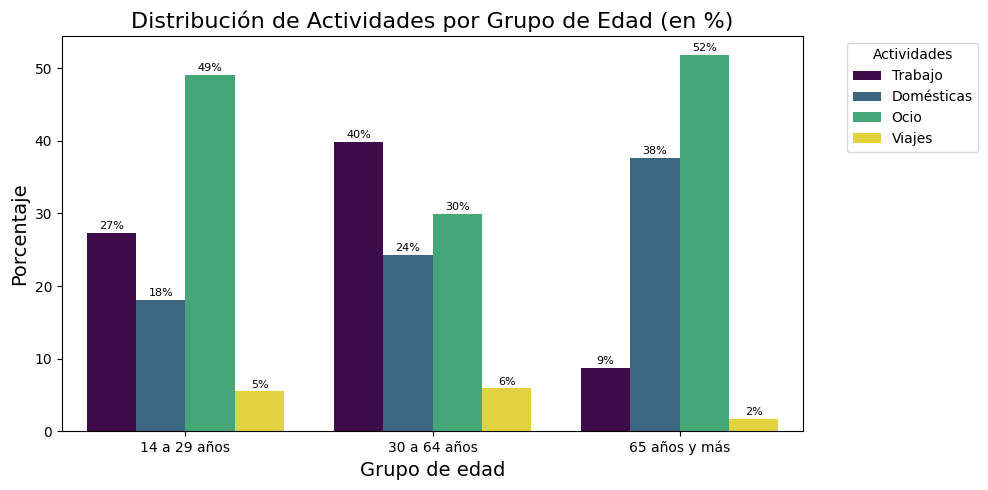

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el tamaño de cada grupo
group_counts = df_merged.groupby(['GRUPO_EDAD_SEL', 'ACTIVIDAD']).size().reset_index(name='Count')

# Calcular el total de cada grupo de edad
total_counts = df_merged.groupby('GRUPO_EDAD_SEL').size().reset_index(name='Total')

# Unir los DataFrames para calcular los porcentajes
merged_counts = pd.merge(group_counts, total_counts, on='GRUPO_EDAD_SEL')

# Calcular el porcentaje
merged_counts['Percentage'] = (merged_counts['Count'] / merged_counts['Total']) * 100

# Graficar los datos
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=merged_counts, x='GRUPO_EDAD_SEL', y='Percentage', hue='ACTIVIDAD', palette='viridis')

# Añadir etiquetas de porcentaje sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Add labels only if height is greater than zero
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         fontsize=8)

# Personalizar la leyenda
handles, labels = barplot.get_legend_handles_labels()
labels = ['Trabajo', 'Domésticas', 'Ocio', 'Viajes']
plt.legend(handles=handles, labels=labels, title='Actividades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Actividades por Grupo de Edad (en %)', fontsize=16)
plt.xlabel('Grupo de edad', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['14 a 29 años', '30 a 64 años', '65 años y más'], rotation=0)

plt.tight_layout()
plt.show()


**Análisis:** Se observa en el siguiente histograma que, los más jóvenes destinan gran parte de su tiempo al ocio.
La edad activa entre 30 y 64 años da cuenta de que la mayor parte de su tiempo está destinado al trabajo.
Así mismo, el tiempo destinado a tareas domésticas se incrementa con la edad.


**¿Cómo distribuyen su tiempo las personas con distintos nivel educativo**

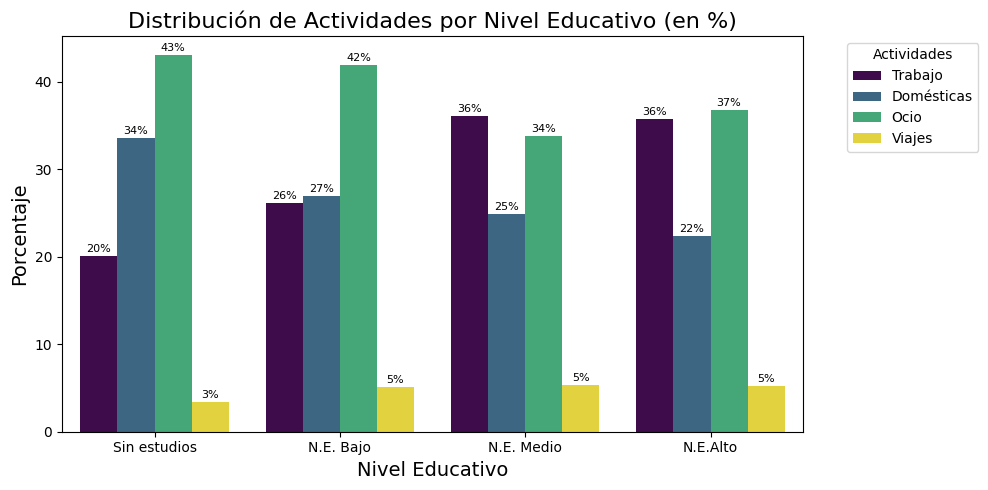

In [27]:
# Calcular el tamaño de cada grupo
group_counts2 = df_merged.groupby(['NIVEL_EDUCATIVO_AGRUPADO', 'ACTIVIDAD']).size().reset_index(name='Count')

# Calcular el total de cada grupo de edad
total_counts2 = df_merged.groupby('NIVEL_EDUCATIVO_AGRUPADO').size().reset_index(name='Total')

# Unir los DataFrames para calcular los porcentajes
merged_counts2 = pd.merge(group_counts2, total_counts2, on='NIVEL_EDUCATIVO_AGRUPADO')

# Calcular el porcentaje
merged_counts2['Percentage'] = (merged_counts2['Count'] / merged_counts2['Total']) * 100

# Graficar los datos
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=merged_counts2, x='NIVEL_EDUCATIVO_AGRUPADO', y='Percentage', hue='ACTIVIDAD', palette='viridis')

# Añadir etiquetas de porcentaje sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Add labels only if height is greater than zero
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         fontsize=8)

# Personalizar la leyenda
handles, labels = barplot.get_legend_handles_labels()
labels = ['Trabajo', 'Domésticas', 'Ocio', 'Viajes']
plt.legend(handles=handles, labels=labels, title='Actividades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Actividades por Nivel Educativo (en %)', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Sin estudios', 'N.E. Bajo', 'N.E. Medio', 'N.E.Alto'], rotation=0)

plt.tight_layout()
plt.show()



**Análisis:** Se observa en el siguiente histograma que, el tiempo destinado al trabajo se incrementa según el nivel educativo.
Por otro lado, el tiempo destinado a tareas domésticas disminuye a medida que aumenta el nivel educativo. Esto puede deberse a la tercerización de las tareas en función del tiempo destinado al trabajo.


**¿Cómo distribuyen su tiempo los mujeres y los varones?**

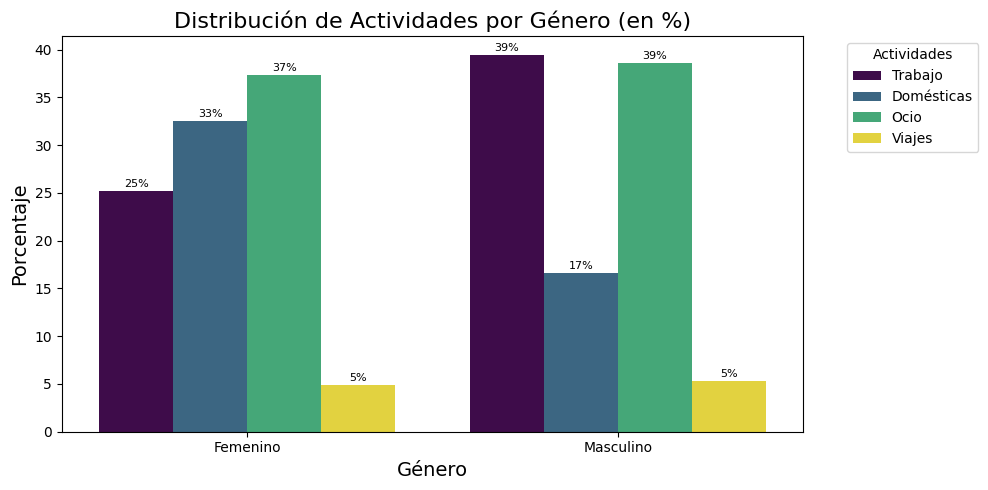

In [28]:
# Calcular el tamaño de cada grupo
group_counts3 = df_merged.groupby(['SEXO_SEL', 'ACTIVIDAD']).size().reset_index(name='Count')

# Calcular el total de cada grupo de edad
total_counts3 = df_merged.groupby('SEXO_SEL').size().reset_index(name='Total')

# Unir los DataFrames para calcular los porcentajes
merged_counts3 = pd.merge(group_counts3, total_counts3, on='SEXO_SEL')

# Calcular el porcentaje
merged_counts3['Percentage'] = (merged_counts3['Count'] / merged_counts3['Total']) * 100

# Graficar los datos
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=merged_counts3, x='SEXO_SEL', y='Percentage', hue='ACTIVIDAD', palette='viridis')

# Añadir etiquetas de porcentaje sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Add labels only if height is greater than zero
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         fontsize=8)

# Personalizar la leyenda
handles, labels = barplot.get_legend_handles_labels()
labels = ['Trabajo', 'Domésticas', 'Ocio', 'Viajes']
plt.legend(handles=handles, labels=labels, title='Actividades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Actividades por Género (en %)', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Femenino', 'Masculino'], rotation=0)

plt.tight_layout()
plt.show()


**Análisis:** Primeramente, se observa que los hombres destinan significativamente más cantidad de su tiempo al trabajo respecto de las mujeres.
Esto se da en contraposición del tiempo destinado a las tareas domésticas, donde las mujeres destinan 33%, mientras que los hombres sólo un 17%.


**¿Cuánto tiempo destinas a tareas doméstica hombre y mujeres?**

<ipython-input-29-604761107bfe>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_duracion_actividad_3, x='SEXO_SEL', y='Duración Promedio', palette='viridis')


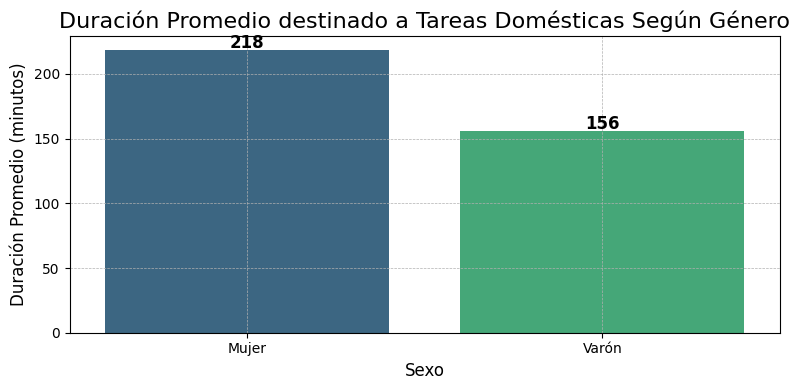

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_merged es tu DataFrame con las columnas necesarias

# Filtrar el DataFrame para incluir solo las filas donde ACTIVIDAD = 3
df_actividad_3 = df_merged[df_merged['ACTIVIDAD'] == 3]

# Agrupar el DataFrame por SEXO_SEL y calcular la duración total
grouped_actividad_3 = df_actividad_3.groupby('SEXO_SEL').size() * 10

# Calcular la cantidad de ID únicos para cada sexo
cantidad_id_actividad_3 = df_actividad_3.groupby('SEXO_SEL')['ID'].nunique()

# Calcular la duración promedio de ACTIVIDAD = 3 según género
duracion_promedio_actividad_3 = grouped_actividad_3 / cantidad_id_actividad_3

# Crear un DataFrame para la visualización
df_duracion_actividad_3 = pd.DataFrame({
    'SEXO_SEL': ['Mujer', 'Varón'],
    'Duración Promedio': duracion_promedio_actividad_3.values
})

# Graficar la duración promedio de ACTIVIDAD = 3 según género
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_duracion_actividad_3, x='SEXO_SEL', y='Duración Promedio', palette='viridis')
plt.title('Duración Promedio destinado a Tareas Domésticas Según Género', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Añadir los valores absolutos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()


**Análisis:** Se observa que las mujeres destinan en promedio 218 minutos (3 hs y media aproximadamente) a la realización de tareas domésticas, mientras que los hombres 156 minutos (2 hs y media).

### ¿Cómo se distribuyen las actividades diarias entre trabajo y ocio a lo largo de la semana?

**¿Cuáles son los principales momentos destinados al trabajo? ¿Cuáles son los principales horarios de ocio?**

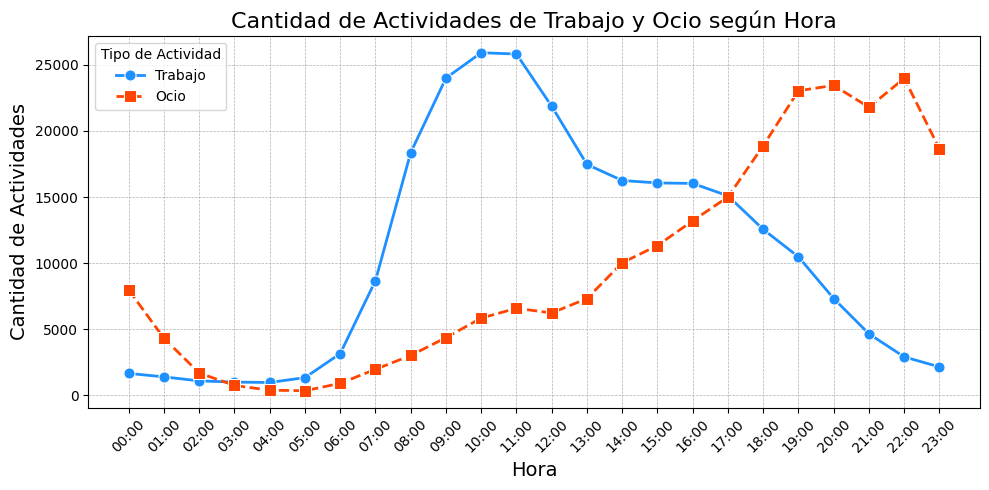

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_merged es tu DataFrame con las columnas necesarias

# 1. Filtrar el DataFrame para incluir solo las filas donde DIA_SEMANA = 1 (Lunes)
df_lunes = df_merged[df_merged['DIA_SEMANA'] == 1]

# 2. Filtrar los datos para ACTIVIDAD = 1 (Trabajo) y ACTIVIDAD = 5 (Ocio)
df_lunes_trabajo = df_lunes[df_lunes['ACTIVIDAD'] == 1]
df_lunes_ocio = df_lunes[df_lunes['ACTIVIDAD'] == 5]

# 3. Agrupar los datos por Hora_Formateada y contar la cantidad de actividades para cada tipo
grouped_trabajo = df_lunes_trabajo.groupby('Hora_Formateada').size().reset_index(name='Cantidad de Trabajo')
grouped_ocio = df_lunes_ocio.groupby('Hora_Formateada').size().reset_index(name='Cantidad de Ocio')

# 4. Fusionar los datos de trabajo y ocio en un solo DataFrame
grouped_data = pd.merge(grouped_trabajo, grouped_ocio, on='Hora_Formateada', how='outer').fillna(0)

# 5. Graficar los datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_data, x='Hora_Formateada', y='Cantidad de Trabajo', marker='o', label='Trabajo', color='dodgerblue', linestyle='-', linewidth=2, markersize=8)
sns.lineplot(data=grouped_data, x='Hora_Formateada', y='Cantidad de Ocio', marker='s', label='Ocio', color='orangered', linestyle='--', linewidth=2, markersize=8)

# Configuración del gráfico
plt.title('Cantidad de Actividades de Trabajo y Ocio según Hora', fontsize=16)
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Cantidad de Actividades', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Tipo de Actividad')
plt.tight_layout()

plt.show()


**Análisis:** En cuanto al trabajo, se observa que la franja horario principalmente comienza a entre las 6 y 7 de la mañana, alcanzando la myor proporción entre las 10 y 11 de la mañana y luego disminuyendo a lo largo del día.
Las actividades de ocio, por su lado, comienzan a incrementarse pronunciadamente desde las 17hs alcanzando su punto máximo a las 22hs.


**¿Cuáles son las principales actividades se realizan los días de semana? ¿y los fines de semana?**

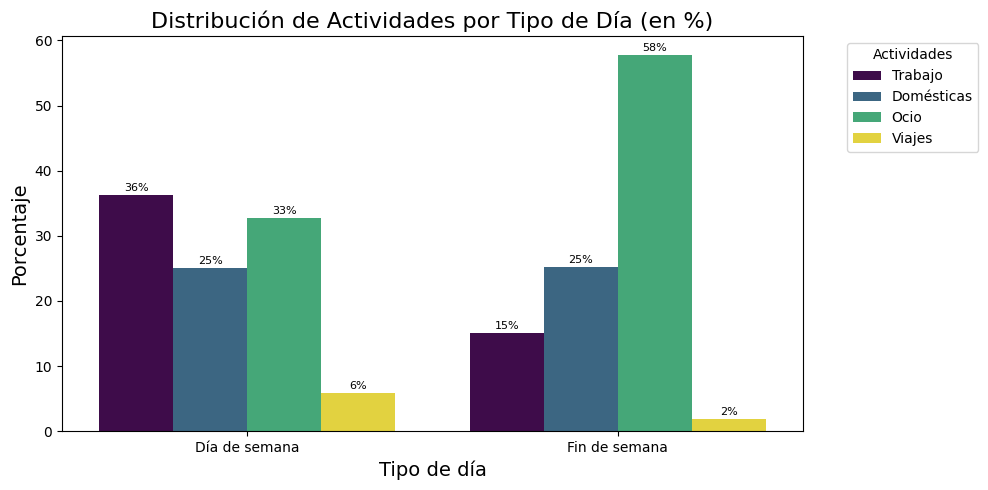

In [31]:
# Calcular el tamaño de cada grupo
group_counts3 = df_merged.groupby(['DIA_SEMANA', 'ACTIVIDAD']).size().reset_index(name='Count')

# Calcular el total de cada grupo de edad
total_counts3 = df_merged.groupby('DIA_SEMANA').size().reset_index(name='Total')

# Unir los DataFrames para calcular los porcentajes
merged_counts3 = pd.merge(group_counts3, total_counts3, on='DIA_SEMANA')

# Calcular el porcentaje
merged_counts3['Percentage'] = (merged_counts3['Count'] / merged_counts3['Total']) * 100

# Graficar los datos
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=merged_counts3, x='DIA_SEMANA', y='Percentage', hue='ACTIVIDAD', palette='viridis')

# Añadir etiquetas de porcentaje sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Add labels only if height is greater than zero
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         fontsize=8)

# Personalizar la leyenda
handles, labels = barplot.get_legend_handles_labels()
labels = ['Trabajo', 'Domésticas', 'Ocio', 'Viajes']
plt.legend(handles=handles, labels=labels, title='Actividades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Actividades por Tipo de Día (en %)', fontsize=16)
plt.xlabel('Tipo de día', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Día de semana', 'Fin de semana'], rotation=0)

plt.tight_layout()
plt.show()


**Análisis:** Los días de semana, la principal actividad es el trabajo. Igualmente, el tiempo se distribuye de forma equitativa entre el ocio y las tareas domésticas.
Los fines de semana, el tiempo destinado al trabajo disminuye y se incrementa significativamente el ocio (ver televisión, computadora y actividades de disfrute).


###¿Existen diferencias significativas en el los patrones de uso del tiempo y la movilidad urbana?

**¿Cuáles son los principales horarios de movilidad según tipo de día (día de semana | fin de semana)?**

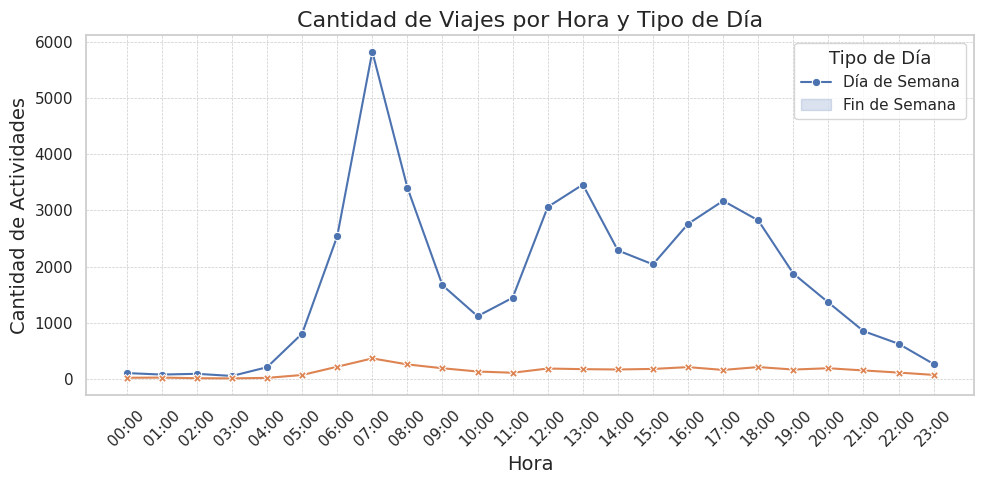

In [32]:
# Filtrar el DataFrame para incluir solo las filas donde ACTIVIDAD = 7
df_actividad_7 = df_merged[df_merged['ACTIVIDAD'] == 7]

# Agrupar los datos por DIA_SEMANA y Hora_Formateada y contar la cantidad de viajes
grouped_data = df_actividad_7.groupby(['DIA_SEMANA', 'Hora_Formateada']).size().unstack(level=0, fill_value=0)

# Establecer estilo
sns.set(style="whitegrid")

# Graficar los datos
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_data, markers=True, dashes=False)
plt.title('Cantidad de Viajes por Hora y Tipo de Día', fontsize=16)
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Cantidad de Actividades', fontsize=14)
plt.legend(title='Tipo de Día', title_fontsize='13', fontsize='11',labels=['Día de Semana', 'Fin de Semana'])
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Análisis:** En el siguiente gráfico se observa que durante los días de semana la cantidad de viajes aumenta significativamente.
Asimismo, se observa que los horarios pico donde la población realiza más cantidad de viajes es primeramente las 7am, en segundo lugar a las  13hs y, por último a las 17hs.


**¿Cuál es el promedio de tiempo destinado a viajar al trabajo según nivel educativo?**

<ipython-input-33-abba1e86b437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_duracion_actividad_7, x='NIVEL_EDUCATIVO_AGRUPADO', y='Duración Promedio', palette='viridis')


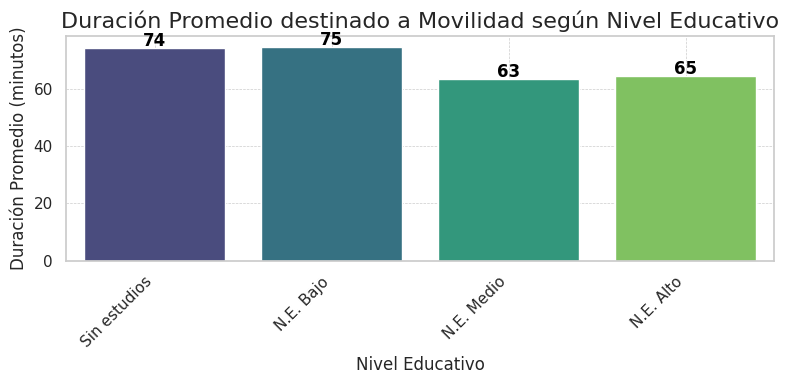

In [33]:
# Filtrar el DataFrame para incluir solo las filas donde ACTIVIDAD = 7
df_actividad_7 = df_merged[df_merged['ACTIVIDAD_1'] == 14]

# Agrupar el DataFrame por NIVEL_EDUCATIVO_AGRUPADO y calcular la duración total
grouped_actividad_7 = df_actividad_7.groupby('NIVEL_EDUCATIVO_AGRUPADO').size() * 10

# Calcular la cantidad de ID únicos para cada nivel educativo
cantidad_id_actividad_7 = df_actividad_7.groupby('NIVEL_EDUCATIVO_AGRUPADO')['ID'].nunique()

# Calcular la duración promedio de ACTIVIDAD = 7 según nivel educativo
duracion_promedio_actividad_7 = grouped_actividad_7 / cantidad_id_actividad_7

# Crear un DataFrame para la visualización
df_duracion_actividad_7 = pd.DataFrame({
    'NIVEL_EDUCATIVO_AGRUPADO': duracion_promedio_actividad_7.index,
    'Duración Promedio': duracion_promedio_actividad_7.values
})

# Mapear los niveles educativos a etiquetas
educacion_labels = {
    1: 'Sin estudios',
    2: 'N.E. Bajo',
    3: 'N.E. Medio',
    4: 'N.E. Alto'
}
df_duracion_actividad_7['NIVEL_EDUCATIVO_AGRUPADO'] = df_duracion_actividad_7['NIVEL_EDUCATIVO_AGRUPADO'].map(educacion_labels)

# Graficar la duración promedio de ACTIVIDAD = 7 según nivel educativo
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_duracion_actividad_7, x='NIVEL_EDUCATIVO_AGRUPADO', y='Duración Promedio', palette='viridis')
plt.title('Duración Promedio destinado a Movilidad según Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', linewidth=0.5)

# Añadir los valores absolutos sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black', weight='bold')

plt.tight_layout()
plt.show()


**Análisis:** El tiempo destinado a viajar al trabajo disminuye de acuerdo al nivel educativo. Esto puede deberse al acceso a otros medios de transporte que disminuyen en el tiempo de viaje al trabajo.

###¿Cómo varía la movilidad urbana y uso del tiempo en actividades diarias según la región geográfica del país?

**¿Cómo son las jornadas laborales en las distintas regiones del país?**

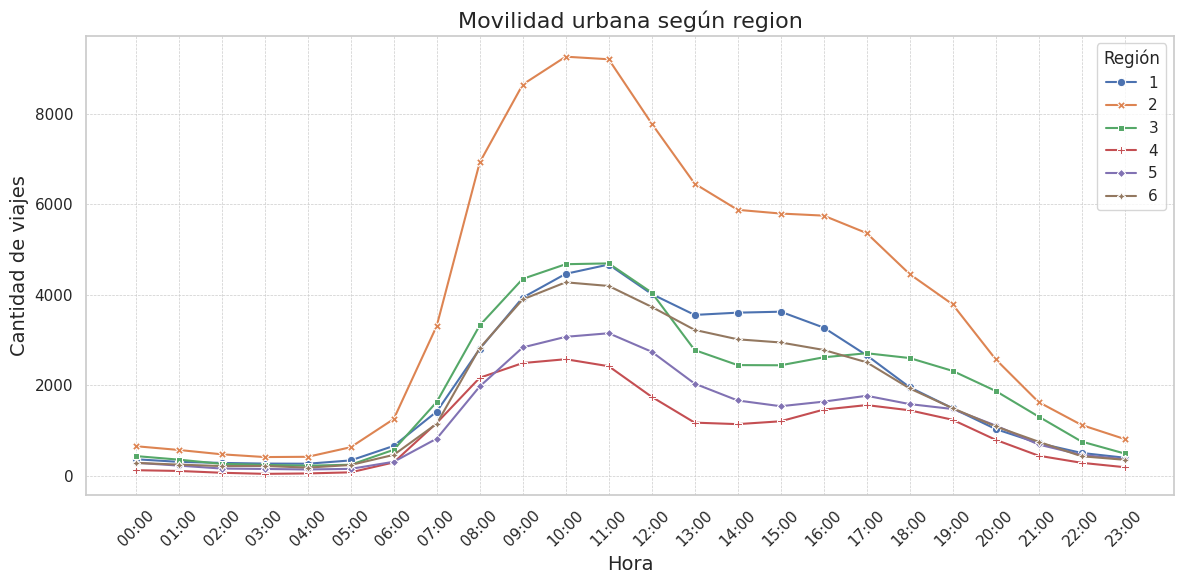

In [34]:
# Filtrar el DataFrame para incluir solo las filas donde ACTIVIDAD = 7
df_actividad_7 = df_merged[df_merged['ACTIVIDAD'] == 1]

# Agrupar los datos por REGION y Hora_Formateada y contar la cantidad de viajes
grouped_data_region = df_actividad_7.groupby(['REGION', 'Hora_Formateada']).size().unstack(level=0, fill_value=0)

# Establecer estilo
sns.set(style="whitegrid")

# Graficar los datos
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data_region, markers=True, dashes=False)
plt.title('Movilidad urbana según region', fontsize=16)
plt.xlabel('Hora', fontsize=14)
plt.ylabel('Cantidad de viajes', fontsize=14)
plt.legend(title='Región')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Análisis:** Si bien en todas las regiones el horario pico destinado al trabajo son las 10 am, es posible observar que en regiones como NOA, NEA y Cuyo, durante el mediodía hay menor proporción de gente trabajando. Sin embargo, en regiones como GBA, Pampeana y Sur, suele haber más jornada extendida en el trabajo, aunque descienda luego del mediodía.

**¿Cómo se distribuye el tiempo destinado a distintas actividades en las regiones del país?**

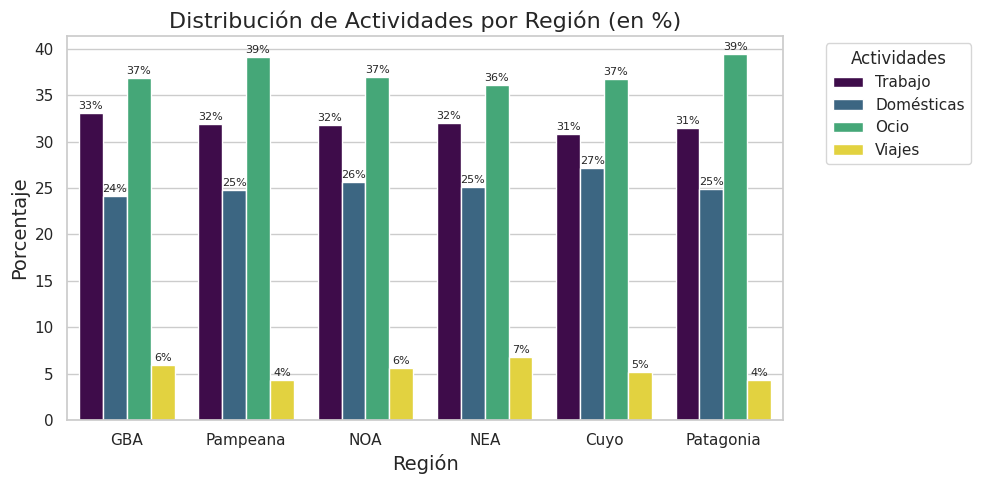

In [35]:
# Calcular el tamaño de cada grupo
group_counts3 = df_merged.groupby(['REGION', 'ACTIVIDAD']).size().reset_index(name='Count')

# Calcular el total de cada grupo de edad
total_counts3 = df_merged.groupby('REGION').size().reset_index(name='Total')

# Unir los DataFrames para calcular los porcentajes
merged_counts3 = pd.merge(group_counts3, total_counts3, on='REGION')

# Calcular el porcentaje
merged_counts3['Percentage'] = (merged_counts3['Count'] / merged_counts3['Total']) * 100

# Graficar los datos
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=merged_counts3, x='REGION', y='Percentage', hue='ACTIVIDAD', palette='viridis')

# Añadir etiquetas de porcentaje sobre las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Add labels only if height is greater than zero
        barplot.annotate(f'{height:.0f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points',
                         fontsize=8)

# Personalizar la leyenda
handles, labels = barplot.get_legend_handles_labels()
labels = ['Trabajo', 'Domésticas', 'Ocio', 'Viajes']
plt.legend(handles=handles, labels=labels, title='Actividades', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribución de Actividades por Región (en %)', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['GBA', 'Pampeana', 'NOA', 'NEA', 'Cuyo', 'Patagonia'], rotation=0)

plt.tight_layout()
plt.show()



**Análisis:** No se observan diferencias entre las principales actividades - ocio, trabajo y tareas domésticas.  Si se reconoce que el tiempo destinado al transporte es levemente más bajo en la región pampeana y la patagonia.



## 4. Principales Insights

**PRINCIPALES INSIGHTS**


- Los jóvenes dedican más tiempo al ocio en comparación con los adultos de mediana edad, quienes se enfocan más en el trabajo. Las personas mayores también dedican más tiempo a las tareas domésticas.

- El tiempo destinado al trabajo aumenta con el nivel educativo, mientras que el tiempo dedicado a las tareas domésticas disminuye.
Durante los días de semana, la mayor parte del tiempo se dedica al trabajo, mientras que los fines de semana se destina más al ocio.

- Los principales momentos dedicados al trabajo son entre las 6-11 de la mañana, y los horarios de ocio son más prominentes entre las 17-22 horas.

- La movilidad urbana es mayor durante los días de semana, con picos en las 7 am, 1 pm, y 5 pm. El tiempo dedicado a viajar al trabajo disminuye a medida que aumenta el nivel educativo.

- Las regiones tienen patrones de trabajo diferentes, con jornadas laborales sin cortes en algunas regiones comparadas con otras. Aunque los tipos de actividades son similares en todas las regiones, hay variaciones en el tiempo dedicado al transporte.

**RECOMENDACIONES**

- Mejorar el transporte público y gestionar picos de demanda. Esto en el largo plazo permitirá optimizar el transporte urbano.

- Considerar políticas específicas para cada región para optimizar el tiempo de transporte y mejorar el acceso a servicios.

- El conocimiento de los patrones de uso del tiempo de forma georreferenciada permitiría desplegar políticas públicas adecuadas a las necesidades de los distintos grupos socioeconómicos.


## Selección de modelos ##

En este proyecto, se ha optado por un enfoque de ensamble que combina técnicas de clustering no supervisado y un modelo de clasificación supervisado. La elección de K-means para el clustering y Random Forest para la clasificación responde a la necesidad de abordar diferentes aspectos del análisis de datos de manera complementaria.

El algoritmo K-means permite identificar grupos de individuos que presentan similitudes en sus patrones de uso del tiempo y características sociodemográficas, lo que facilita la segmentación de la población en clusters con comportamientos homogéneos. Esta técnica es eficaz para descubrir relaciones ocultas en los datos sin necesidad de tener etiquetas predefinidas.

Por otro lado, Random Forest se selecciona como el modelo de clasificación debido a su robustez y capacidad para manejar grandes volúmenes de datos con múltiples características. Este algoritmo, al ser un ensamble de árboles de decisión, es ideal para predecir la actividad realizada por los individuos en horarios específicos, considerando las variables sociodemográficas y los clusters previamente identificados. La combinación de ambos modelos permitirá no solo identificar patrones, sino también prever comportamientos futuros, generando insights valiosos para la toma de decisiones.

El proceso a desarrollar incluirá la ingeniería de atributos para la preparación de los datos, el uso de K-means para segmentación, y finalmente, la aplicación de Random Forest para la predicción de actividades. A lo largo del proceso, se implementarán técnicas de validación y optimización de hiperparámetros para garantizar la precisión y efectividad del modelo resultante.

Ensamblar la clusterización con el modelo de clasificación puede ser crucial en función de los objetivos del proyecto por varias razones:

*   Nos permite identificar grupos con características similares, lo que ayuda a la clasificación a hacer predicciones más precisas al adaptar el modelo a cada grupo específico.

*   Por otro lado, nos permitirá mejorar la precisión al reducir la complejidad del problema.

*   A nivel estratégico / comercial, permite aplicar estrategias personalizadas para cada grupo, mejorando la eficiencia en la toma de decisiones.

*   Analíticamente nos brindará una comprensión más profunda de cómo los diferentes segmentos respondes a variables específicas, lo que enriquece la capacidad predictiva del modelo.

En resumen, combinar ambos métodos mejora la precisión del análisis y permite una toma de decisiones más informada.

La variable ACTIVIDAD será la variable dependiente en los modelos a desplegar. Debido a que esta tiene 47 valores y etiquetas diferentes y en función de nuestro conocimiento en el campo, se reduciran teóricamente los valores a 6.

### Parte I. Modelo de **clustering**

In [36]:
# Eliminar las filas donde 'ACTIVIDAD' tiene los valores 3, 7
df_merged = df_merged[~df_merged['ACTIVIDAD'].isin([3, 7])]


In [37]:
# Con el objetivo de agilizar el modelo, usaremos una muestra del dataset por la cantidad de casos que tiene

import pandas as pd

df_sample = df_merged.sample(frac=0.5, random_state=42)

#### Clustering

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Seleccionar las columnas relevantes para clustering
X = df_sample[['GRUPO_EDAD_SEL', 'SEXO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'REGION']]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Selección del valor óptimo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

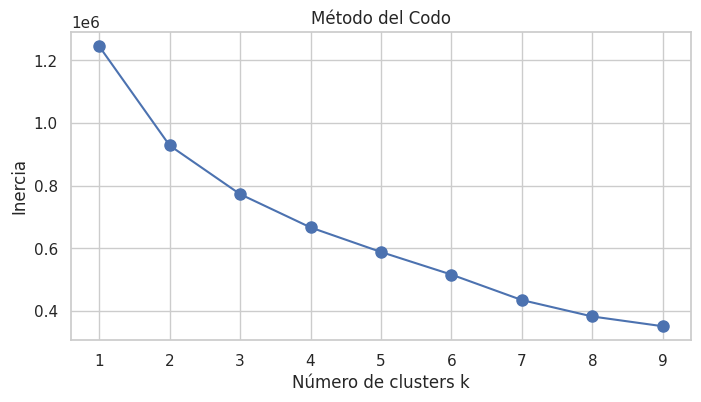

In [40]:
# Calcular la inercia para diferentes valores de k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Número de clusters k')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [41]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans

# Definir el rango de números de clusters
cluster_range = range(2, 6)  # Desde 1 hasta 6 clusters

# Inicializar diccionarios para almacenar los resultados
db_scores = {}
calinski_scores = {}

for k in cluster_range:
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)  # Usar los datos escalados

    # Calcular el índice de Davies-Bouldin
    db_scores[k] = davies_bouldin_score(X_scaled, clusters)

    # Calcular el índice de Calinski-Harabasz
    calinski_scores[k] = calinski_harabasz_score(X_scaled, clusters)

# Imprimir los resultados
print("Davies-Bouldin Scores:")
for k, score in db_scores.items():
    print(f'Número de clusters: {k}, Davies-Bouldin Score: {score:.2f}')


print("\nCalinski-Harabasz Scores:")
for k, score in calinski_scores.items():
    print(f'Número de clusters: {k}, Calinski-Harabasz Score: {score:.2f}')




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Davies-Bouldin Scores:
Número de clusters: 2, Davies-Bouldin Score: 1.61
Número de clusters: 3, Davies-Bouldin Score: 1.38
Número de clusters: 4, Davies-Bouldin Score: 1.34
Número de clusters: 5, Davies-Bouldin Score: 1.26

Calinski-Harabasz Scores:
Número de clusters: 2, Calinski-Harabasz Score: 106175.28
Número de clusters: 3, Calinski-Harabasz Score: 94995.09
Número de clusters: 4, Calinski-Harabasz Score: 89944.48
Número de clusters: 5, Calinski-Harabasz Score: 86795.94


*Análisis de DB Score:*

El Davies-Bouldin Score (DB) Se define como la medida de similitud promedio de cada grupo con su grupo más similar. Un DB Score más bajo indica una mejor calidad del clustering, ya que significa que los clusters son más compactos y están más separados entre sí.

El menor DB Score se obtiene con 5 clusters. Lo que sugiere que 5 puede ser la mejor opción en términos de calidad de clustering según este índice.

*Análisis de CH Score:*

El Calinski-Harabasz Score (CH) mide la relación entre la variación intra-cluster y la variación inter-cluster. Un CH Score más alto indica una mejor calidad del clustering.

El mayor CH Score se obtiene con 2 clusters, lo que sugiere que el clustering con 2 clusters tiene la mejor relación entre la variación intra-cluster y la variación inter-cluster.

#### Validación del modelo

Dado el comportamiento observado en el gráfico del codo y las métricas de Davies-Bouldin y Calinski-Harabasz, vamos a usar k=4 clústeres. Este punto ofrece un  equilibrio entre la complejidad del modelo y la separación de clústeres, sin que haya un incremento considerable en la calidad de los clústeres al aumentar k más allá de este valor.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


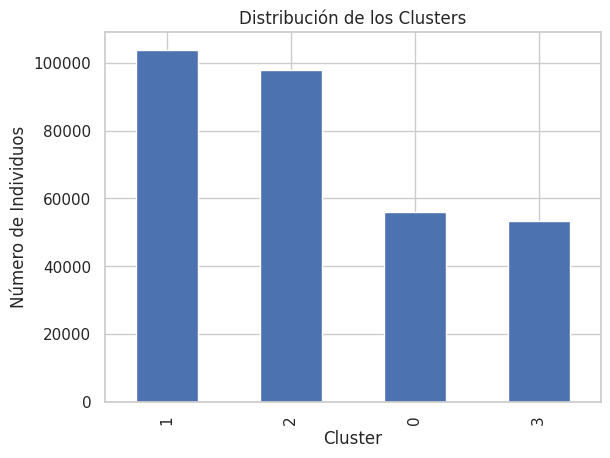

In [42]:
# Definir el número de clusters
n_clusters = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar el número de miembros en cada cluster
df_sample['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Número de Individuos')
plt.title('Distribución de los Clusters')
plt.show()


#### Descripción sociodemográfica de cada cluster

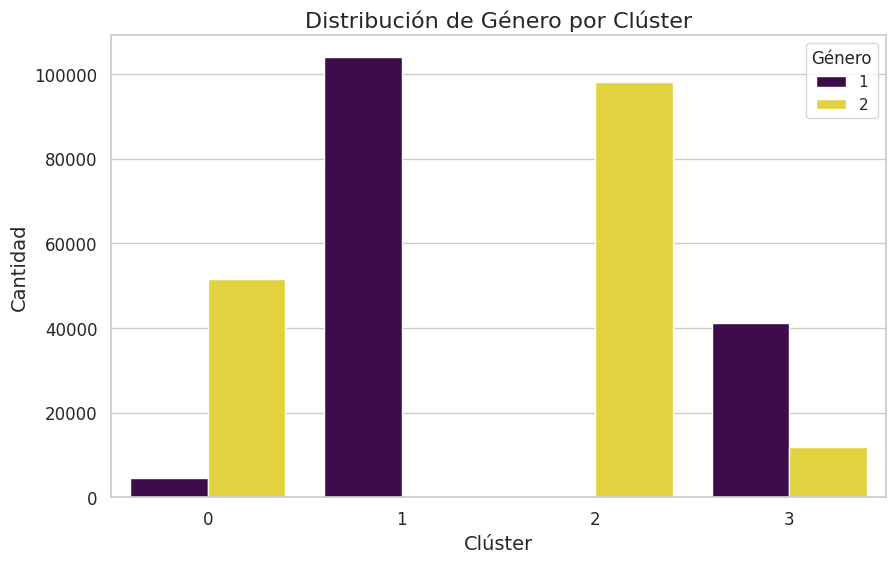

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer un tema y estilo general
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con la paleta viridis
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='cluster', hue='SEXO_SEL', palette="viridis")
plt.title('Distribución de Género por Clúster', fontsize=16)
plt.xlabel('Clúster', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(title='Género', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


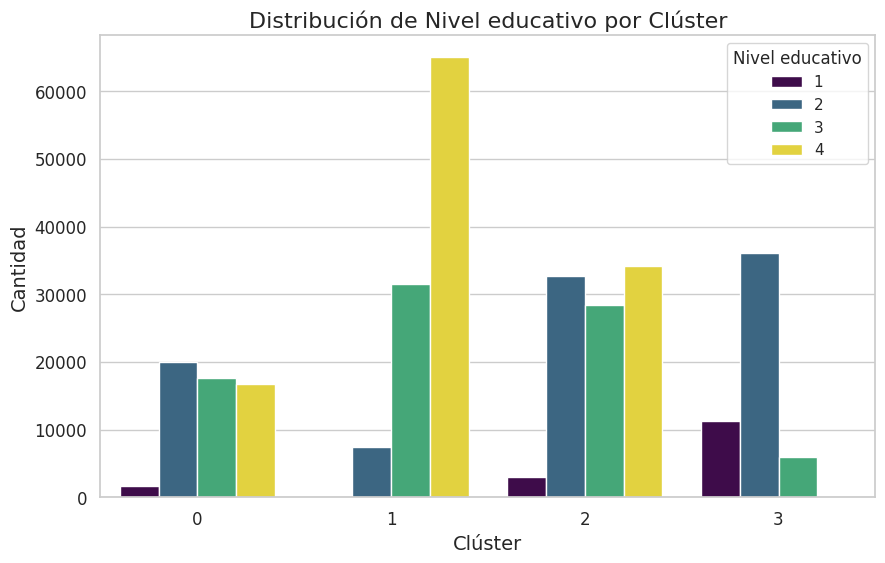

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer un tema y estilo general
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con la paleta viridis
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='cluster', hue='NIVEL_EDUCATIVO_AGRUPADO', palette="viridis")
plt.title('Distribución de Nivel educativo por Clúster', fontsize=16)
plt.xlabel('Clúster', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(title='Nivel educativo', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


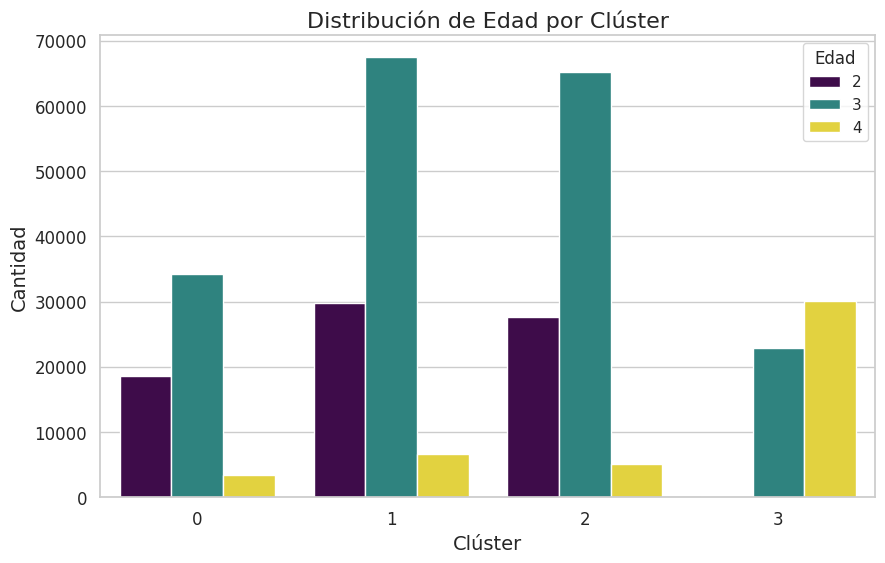

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer un tema y estilo general
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras con la paleta viridis
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='cluster', hue='GRUPO_EDAD_SEL', palette="viridis")
plt.title('Distribución de Edad por Clúster', fontsize=16)
plt.xlabel('Clúster', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(title='Edad', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


El cluster 0 esta compuesta por más hombres que mujeres. El nivel educativo es bajo-medio. Las edades son relativamente equilibras entre los rangos.

El cluster 1 esta compuesto solo por mujeres. El nivel educativo es principalmente alto. La mayoría se encuentra en edad de población activa.

El cluster 2 esta compuesto solo por hombres. El nivel educativo es equilibrado entre bajo-medio-alto. La mayoría se encuentra en edad de población activa.

El cluster 3 está compuesto por una más mujeres que hombres. El nivel educativo es entre medio y bajo. La mayoría se encuentra entre adultos mayores..

### Parte II. Ensamble de modelo

#### Modelo 1 - Arbol de decisión

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Variables predictoras (features) incluyendo el clúster
features = ['GRUPO_EDAD_SEL', 'SEXO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'REGION', 'Hora_Formateada', 'cluster']
X = df_sample [features]
y = df_sample ['ACTIVIDAD']

# Codificación de variables categóricas
X_encoded = pd.get_dummies(X, columns=['SEXO_SEL', 'NIVEL_EDUCATIVO_AGRUPADO', 'REGION', 'Hora_Formateada', 'cluster'])

# Verificar las dimensiones después de la codificación
print(X_encoded.shape)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))



(311336, 41)
              precision    recall  f1-score   support

           1       0.74      0.74      0.74     28212
           5       0.78      0.78      0.78     34056

    accuracy                           0.76     62268
   macro avg       0.76      0.76      0.76     62268
weighted avg       0.76      0.76      0.76     62268



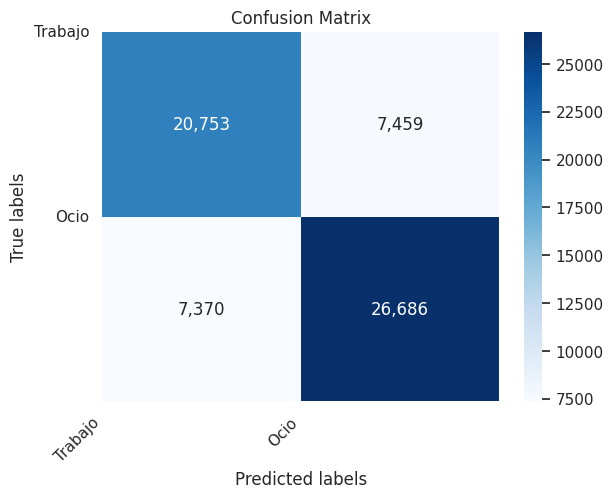

In [47]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para la especificidad
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión con formato ajustado para números grandes
sns.heatmap(conf_matrix, annot=True, fmt=',', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Definir las etiquetas de los ejes x e y con las etiquetas proporcionadas
tick_labels = ['Trabajo', 'Ocio']

# Ajustar las etiquetas de los ejes x e y
tick_positions = range(len(tick_labels))
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.yticks(tick_positions, tick_labels, rotation=0, ha='right')

plt.show()


In [53]:
   from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # La especificidad es la proporción de verdaderos negativos (TN) sobre la suma de verdaderos negativos (TN) y falsos positivos (FP)
    specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])

    # Imprimir todas las métricas
    print(f"Métricas del modelo con k={k}:")
    print("Precisión:", precision)
    print("Sensibilidad (Recall):", recall)
    print("Puntuación F1:", f1)
    print("Especificidad:", specificity)
    print(classification_report(y_test, y_pred))

Métricas del modelo con k=15:
Precisión: 0.7617896592212368
Sensibilidad (Recall): 0.7618519946039699
Puntuación F1: 0.7618192648860626
Especificidad: 0.7356089607259322
              precision    recall  f1-score   support

           1       0.74      0.74      0.74     28212
           5       0.78      0.78      0.78     34056

    accuracy                           0.76     62268
   macro avg       0.76      0.76      0.76     62268
weighted avg       0.76      0.76      0.76     62268



#### Modelo 2 - KNN

In [48]:
# Variables predictoras (features) incluyendo el clúster con sufijo 2
features_2 = ['Hora_Formateada', 'cluster']
X_2 = df_sample[features_2]
y_2 = df_sample['ACTIVIDAD']

# Codificación de variables categóricas
X_encoded_2 = pd.get_dummies(X_2, columns=['Hora_Formateada', 'cluster'])

# Verificar las dimensiones después de la codificación
print(X_encoded_2.shape)


(311336, 28)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_encoded_2, y_2, test_size=0.2, random_state=42)



Métricas del modelo con k=1:
Precisión: 0.6502201651395054
Sensibilidad (Recall): 0.6499967880773431
Puntuación F1: 0.6501015079578194
Especificidad: 0.6173614064936906
              precision    recall  f1-score   support

           1       0.61      0.62      0.62     28212
           5       0.68      0.68      0.68     34056

    accuracy                           0.65     62268
   macro avg       0.65      0.65      0.65     62268
weighted avg       0.65      0.65      0.65     62268

Matriz de Confusión con k=1:
[[17417 10795]
 [10999 23057]]
Métricas del modelo con k=5:
Precisión: 0.6951820773042737
Sensibilidad (Recall): 0.6952206590865292
Puntuación F1: 0.6952010515403486
Especificidad: 0.6629094002552105
              precision    recall  f1-score   support

           1       0.66      0.66      0.66     28212
           5       0.72      0.72      0.72     34056

    accuracy                           0.70     62268
   macro avg       0.69      0.69      0.69     62268
wei

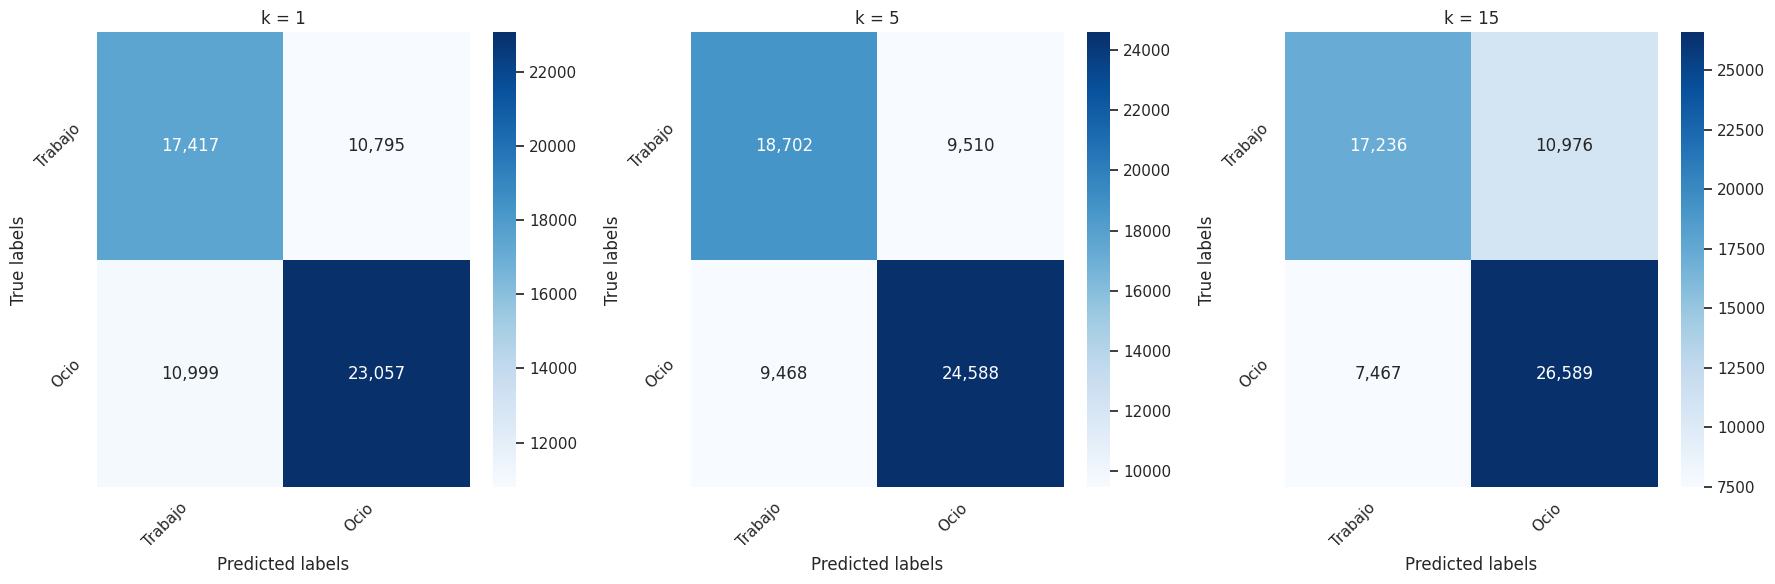

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definir lista de valores de k
k_values = [1, 5, 15]

# Crear subplots para mostrar las matrices de confusión
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, k in enumerate(k_values):
    # Inicializar y ajustar el clasificador KNeighborsClassifier con el valor de k actual
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2, y_train_2)

    # Realizar predicciones
    y_pred_2 = knn.predict(X_test_2)

    # Calcular la precisión del modelo
    accuracy2 = accuracy_score(y_test_2, y_pred_2)
    precision2 = precision_score(y_test_2, y_pred_2, average='weighted')
    recall2 = recall_score(y_test_2, y_pred_2, average='weighted')
    f12 = f1_score(y_test_2, y_pred_2, average='weighted')

    # Crear la matriz de confusión
    conf_matrix2 = confusion_matrix(y_test_2, y_pred_2)

    # La especificidad es la proporción de verdaderos negativos (TN) sobre la suma de verdaderos negativos (TN) y falsos positivos (FP)
    specificity2 = conf_matrix2[0,0] / (conf_matrix2[0,0] + conf_matrix2[0,1])

    # Imprimir todas las métricas
    print(f"Métricas del modelo con k={k}:")
    print("Precisión:", precision2)
    print("Sensibilidad (Recall):", recall2)
    print("Puntuación F1:", f12)
    print("Especificidad:", specificity2)
    print(classification_report(y_test_2, y_pred_2))

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión con k={k}:")
    print(conf_matrix2)

    # Graficar la matriz de confusión
    sns.heatmap(conf_matrix2, annot=True, fmt=',', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'k = {k}')

    # Definir las etiquetas de los ejes x e y con las etiquetas proporcionadas
    tick_labels = ['Trabajo', 'Ocio']
    axs[i].set_xlabel('Predicted labels')
    axs[i].set_ylabel('True labels')
    axs[i].set_xticklabels(tick_labels, rotation=45, ha='right')
    axs[i].set_yticklabels(tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()



#### Validación del modelo

Análisis de los modelos:

**MODELO 1: Árbol de Decisión**

*Modelo de confusión*
El modelo muestra una mayor cantidad de verdaderos positivos en ambas clases, con errores de clasificación relativamente bajos.

El árbol de decisión muestra un buen rendimiento con una alta precisión, recall y F1-score en ambas clases. La exactitud del 76% indica un buen desempeño general. La matriz de confusión muestra que los errores están distribuidos de manera equitativa entre las clases.

**MODELO 2: KNN con k=1**


*Modelo de confusión*
Se observan errores significativos en ambas clases, con una mayor tasa de falsos positivos y falsos negativos.

El modelo KNN con k=1 muestra un rendimiento moderado, con una precisión, recall y F1-score más bajos en comparación con el árbol de decisión. La exactitud del 65% indica que el modelo no es tan efectivo para clasificar correctamente como el árbol de decisión.

**MODELO 3: KNN con k=5**

*Modelo de confusión*
Menor cantidad de errores en comparación con k=1, pero aún presenta falsos positivos y negativos.

Con k=5, el modelo mejora su rendimiento respecto a k=1, con un aumento en la precisión, recall y F1-score. La exactitud del 70% refleja una mejora significativa en la capacidad del modelo para clasificar correctamente.

**MODELO 4: KNN con k=15**

*Modelo de confusión*
Mejora en la clasificación de la clase 5 con una mayor precisión, pero con una ligera reducción en la clase 1.


A medida que k aumenta a 15, el modelo mantiene un rendimiento equilibrado en ambas clases, con una precisión y F1-score similares a k=5. Sin embargo, la especificidad indica que el modelo es más robusto en la clase 5 que en la clase 1.

CONCLUSIÓN: El modelo 1, el Árbol de Decisió ofrece el mejor rendimiento general en términos de precisión, recall y F1-score. Es el modelo más equilibrado, especialmente si se prioriza la precisión en ambas clases.



### Parte III. Mejora de modelo

#### Validación cruzada

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Definir el modelo
model = DecisionTreeClassifier(random_state=42)

# Validación Cruzada K-Fold
cv_scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print(f'Puntajes de validación cruzada: {cv_scores}')
print(f'Precisión media de validación cruzada: {np.mean(cv_scores)}')


Puntajes de validación cruzada: [0.76018179 0.76085246 0.76127001 0.76114154 0.75898951]
Precisión media de validación cruzada: 0.7604870631898282


 Estos valores representan la precisión del modelo en cada uno de las particiones de la validación cruzada. En este caso, el modelo fue evaluado en cinco, y estos puntajes reflejan cómo de bien se desempeñó el modelo en cada pliegue.

 El rango de los puntajes varía entre aproximadamente 0.759 y 0.761. Esto sugiere que el rendimiento del modelo es relativamente consistente a través de los diferentes pliegues.

Consistencia del Modelo: La consistencia en los puntajes de validación cruzada indica que el modelo tiene un rendimiento estable y no está sobreajustado a una partición específica de los datos.

Adecuación del Modelo: La precisión promedio del 76% es un buen indicador de que el modelo es efectivo en la tarea de clasificación.

#### Optimización de hiperparámetros con GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = DecisionTreeClassifier(random_state=42)

# Definir el rango de hiperparámetros para probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ejecutar GridSearchCV
grid_search.fit(X_encoded, y)

# Mostrar los mejores parámetros y el mejor puntaje
print(f'Los mejores parámetros: {grid_search.best_params_}')
print(f'El mejor puntaje de validación: {grid_search.best_score_}')


Los mejores parámetros: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
El mejor puntaje de validación: 0.760506334983685


Precisión del Modelo: El mejor puntaje de validación obtenido es aproximadamente 0.76, lo que indica que el modelo tiene una precisión del 76% en el conjunto de validación con los mejores parámetros encontrados. Este puntaje sugiere un rendimiento sólido del modelo en términos de precisión.
